# Analysis code for "*MW Accelerometry via MSP Timing: Orbital Periods*" 
Authors: Aakash Ravi and Reza Ebadi

## Import libraries and define plot settings

In [1]:
from psrqpy import QueryATNF
import pandas as pd
import numpy as np
from numpy import random
from scipy.special import erf
from scipy.stats import norm, rayleigh
import scipy.linalg as linalg
import emcee
import corner
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rc, rcParams
from IPython.display import display, Math
import astropy.coordinates as coord
coord.galactocentric_frame_defaults.set('pre-v4.0') 
from astropy import units as u
from astropy.coordinates import SkyCoord

# PLOT SETTINGS
%matplotlib inline
%config InlineBackend.figure_format = "retina"
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"

## Binary Pulsar Data Input

In [2]:
col_names=['NAME',
           'PB',
           'PB_ERR',
           'PBDOT',
           'PBDOT_ERR',
           'M1',
           'M1_ERR',
           'M2',
           'M2_ERR',
           'ECC',
           'ECC_ERR',
           'DIST',
           'DIST_ERR',
           'GL',
           'GB',
           'PMTOT',
           'PMTOT_ERR',
           'P0'
          ]

In [3]:
#Lijing Shao, Norbert Wex, Shuang-Yong Zhou; arXiv:2007.04531
Bidata1 = ['J0348+0432',
           0.102424062722,
           0.000000000007,
           -0.273e-12,
           0.045e-12,
           2.01,
           0.04,
           0.172,
           0.003,
           2.6e-6,
           0.9e-6,
           2.1,
           0.2,
           183.3368,
           -36.7736,
           5.3,
           0.4,
           39.1226569017806
          ]
coor = SkyCoord('04h37m15.8147635s', '−47d15m08.624170s', frame='icrs')
gl = coor.galactic.l.deg
gb = coor.galactic.b.deg
Bidata2 = ['J0437−4715',
           5.7410458,
           0.0000003,
           3.730e-12,
           0.003e-12,
           1.44,
           0.07,
           0.228,
           0.006,
           1.9182e-5,
           0.0001e-5,
           0.15679,
           0.00025,
           gl,
           gb,
           140.852,
           000.001,
           5.757451924362137
          ]
coor = SkyCoord('06h13m43.975672s', '−02d00m47.22533s', frame='icrs')
gl = coor.galactic.l.deg
gb = coor.galactic.b.deg
Bidata3 = ['J0613−0200',
            1.198512575184,
            0.000000000013,
           2.6e-14,
           0.7e-14,
           1.42,
           0.46,
           0.14,
           0.03,
           4.50e-6,
           0.09e-6,
            1.11 ,
           0.05,
           gl,
           gb,
            10.514,
            00.017,
           3.061844088094608
          ]
pmalpha=2.562
pmalpha_err=0.014
pmdelta=-25.61
pmdelta_err=0.02
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata4=['J1012+5307',
           0.604672723085,
           0.000000000003,
           5.2e-14,
           0.4e-14,
           1.83,
           0.11,
           0.174,
           0.007,
           1.1e-6,
           0.1e-6,
           0.8,
           0.2,
           160.347,
           50.9858,
           pm,
           pm_err,
         5.255749014115410
          ]
pmalpha=-18.2
pmalpha_err=6.4
pmdelta=-3
pmdelta_err=16
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata5=['J1022+1001',
           7.8051348,
           0.0000011,
           2.1e-13,
           0.7e-13,
           1.72,
           0.65,
           1.03,
           0.36,
           9.704e-5,
           0.005e-5,
            0.72,
           0.02,
           242.4,
           43.7,
           pm,
           pm_err,
         16.45292995606771
          ]
coor = SkyCoord('15h37m09.961730s', '11d55m55.43387s', frame='icrs')
gl = coor.galactic.l.deg
gb = coor.galactic.b.deg
pmalpha=1.482
pmalpha_err=0.007
pmdelta=-25.285
pmdelta_err=0.012
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata6=['B1534+12',
           0.420737298879,
           0.000000000002,
           -0.1366e-12,
           0.0003e-12,
           1.3330,
           0.0002,
           1.3455,
           0.0002,
           0.27367752,
           0.00000007,
           1.051,
           0.005,
           gl,
           gb,
           pm,
           pm_err,
           1000/ 26.38213277689397
          ]
coor = SkyCoord('17h13m49.5331960s', '+07d47m37.49256s', frame='icrs')
gl = coor.galactic.l.deg
gb = coor.galactic.b.deg
pmalpha= 4.924
pmalpha_err= 0.001
pmdelta=-3.913
pmdelta_err=0.002
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata7=['J1713+0747',
           67.825131000,
           00.000000001,
           5e-13,
           1e-13,
           1.33,
           0.10,
           0.289,
           0.007,
           7.49402e-5,
           0.00004e-5,
           1.20,
           0.03,
           gl,
           gb,
           pm,
           pm_err,
           1000/218.8118404171579
          ]
Bidata8=['J1738+0333',
           0.3547907398724,
           0.0000000000013,
           -17.0e-15,
           3.1e-15,
           1.46,
           0.06,
           0.181,
           0.008,
           3.4e-7,
           1.1e-7,
           1.47,
           0.10,
           27.7213,
           17.7422,
           8.675,
           0.008,
           5.850095859775683
          ]
Bidata9=['J1756−2251',
           0.31963390143,
           0.00000000003,
           -2.29e-13,
           0.05e-13,
           1.341,
           0.007,
           1.230,
           0.007,
           0.1805694,
           0.0000002,
           0.95,
           0.50,
           6.498658,
           0.948010,
           19/2,     #proper motion is < 19. I decided to put it this way!
           19/2,
           28.4615890259983
          ]
pmalpha= -9.519
pmalpha_err= 0.003
pmdelta= 35.775
pmdelta_err= 0.010
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata10=['J1909−3744',
           1.533449475278,
           0.000000000001,
           5.03e-13,
           0.05e-13,
           1.48,
           0.03,
           0.209,
           0.001,
           1.04e-7,
           0.06e-7,
           1.14,
           0.01,
           359.7,
           -19.6,
           pm,
           pm_err,
          2.947108069766629
          ]
coor = SkyCoord('19h15m27.99942s', '16d06m27.3868s', frame='icrs')
gl = coor.galactic.l.deg
gb = coor.galactic.b.deg
pmalpha= -1.23          #VLBI value:-0.72 
pmalpha_err= 0.04       #VLBI value:0.11
pmdelta= -0.83          #VLBI value:-0.025
pmdelta_err=0.04        #VLBI value:0.135
pm = np.sqrt((pmalpha)**2+(pmdelta)**2)
pm_err = np.abs(((pmalpha)*(pmalpha_err)+(pmdelta)*(pmdelta_err))/pm)
Bidata11=['B1913+16',
           0.322997448918,
           0.000000000003,
           -2.423e-12,
           0.001e-12,
           1.438,
           0.001,
            1.390,
            0.001,
           0.6171340,
           0.0000004,
           9, #VLBI value: 4.9
           3, #VLBI value: 1.4
           gl,
           gb,
           pm,
           pm_err,
           1000/16.940537785677
          ]
Bidata12=['J2222−0137',
           2.44576456,
           0.00000013,
           0.27e-12,
           0.09e-12,
           1.76,
           0.06,
           1.293,
           0.025,
           0.380940e-4,
           0.000003e-4,
           0.2673,
           0.001,
           62.0184,
           -46.0753,
           45.09,
           0.02,
           32.81785905434272
          ]
BiPulsars = [Bidata1,Bidata2,Bidata3,Bidata4,Bidata5,Bidata6,Bidata7,Bidata8,Bidata9,Bidata10,Bidata11,Bidata12]
data_SWZ = pd.DataFrame(BiPulsars, columns = col_names)
#Lijing Shao, Norbert Wex, Shuang-Yong Zhou; arXiv:2007.04531

In [4]:
#Haniewicz et al.; arXiv:2007.07565
Bidata=['J1829+2456',
           1.17602795267,
           0.00000000018,
           -5e-14,
           2e-14,
           1.295,
           0.011,
           1.9,
           0.6,
           0.1391437,
           0.0000003,
           0.91,
           0.18*2,
           53.3424,
           15.6120,
           9.41,
           0.08,
           41.0098235928589
          ]
BiPulsars = [Bidata]
data_Han = pd.DataFrame(BiPulsars, columns = col_names)
#Haniewicz et al.; arXiv:2007.07565

In [5]:
# combine datasets
PBdata = pd.concat([data_SWZ, data_Han])
PBdata = PBdata.drop_duplicates(subset='NAME', keep='first')
PBdata.insert(0, 'M', PBdata['M1']+PBdata['M2'])
print('Total number of binary pulsars is: ' + str(PBdata.shape[0]))

Total number of binary pulsars is: 13


## Calculate  $f\left(D,l,b\right)$ and $a_b$  for all pulsars in sample
\begin{align}
f\left(D,l,b\right) & = -\cos b\left[\text{cos}l+\frac{D/r_{0}\cdot\cos b-\cos l}{\sin^{2}l+\left(D/r_{0}\cdot\cos b-\cos l\right)^{2}}\right], \\
a_b & = c\dot{P_b}/P_b-\mu^2 D -  a_{\text{GW}}, \\
a_{\text{GW}} & = c\dot{P}^{\text{GW}}_b/P_b, \\
\dot{P}^{\text{GW}}_b & = -\frac{192 \pi }{5c^5} \eta (GM)^{5/3} n_{\rm b}^{5 /
  3}\left(1+\frac{73}{24} e^{2}+\frac{37}{96}
  e^{4}\right)\left(1-e^{2}\right)^{-7 / 2}
\end{align}

In [6]:
# DEFINE CONSTANTS
c = 299792458
maspyr = np.pi/2.0435328e16
kpc = 9.69394202136e19/np.pi
R0 = 8.3*kpc
G = 6.67430e-11
solarmass = 1.989e30
day = 24*60*60

PBdata.insert(0,'PBDOTGW', (-192*np.pi/(5*(c**5)))*(PBdata['M1']*PBdata['M2']/(PBdata['M'])**2)*((G*PBdata['M']*solarmass*2*np.pi/(PBdata['PB']*day))**(5/3))*(1 + (73/24)*PBdata['ECC']**2 + (37/96)*PBdata['ECC']**4)*((1-PBdata['ECC']**2)**(-7/2)))
PBdata.insert(0,'a_galGW',c * (PBdata['PBDOT'])/(PBdata['PB']*day) - (maspyr*PBdata['PMTOT'])**2*(PBdata['DIST']*kpc))
PBdata.insert(0,'a_GW',c * (PBdata['PBDOTGW'])/(PBdata['PB']*day))
PBdata.insert(0,'a',PBdata['a_galGW']-PBdata['a_GW'])
PBdata.insert(0,'beta',(PBdata['DIST']*kpc/R0)*np.cos(PBdata['GB']/180*np.pi)-np.cos(PBdata['GL']/180*np.pi))
PBdata.insert(0,'x', -np.cos(PBdata['GB']/180*np.pi)*(np.cos(PBdata['GL']/180*np.pi)
            +PBdata['beta']/((np.sin(PBdata['GL']/180*np.pi))**2+PBdata['beta']**2)))
PBdata.insert(0,'aplan', 1.89e-10*PBdata['x'])
PBdata.insert(0,'abr', PBdata['a'] - PBdata['aplan'])
PBdata.insert(0,'y', (PBdata['a'])/1e-10) # neglect vert accel.
print('f(D,l,b) and a calculated for all pulsars in sample.')


x = PBdata['x'].iloc[:].values
y = PBdata['y'].iloc[:].values


f(D,l,b) and a calculated for all pulsars in sample.


## Calculate observational covariance matrices for all pulsars in sample
$\mathbf{\Sigma}=\left(\begin{array}{cc}
\sigma_{f}^{2} & \sigma_{fa}\\
\sigma_{fa} & \sigma_{a}^{2}
\end{array}\right)$

In [7]:
np.random.seed(0)
N = 10000

sx = [0] * PBdata.shape[0]
sy = [0] * PBdata.shape[0]
rxy = [0] * PBdata.shape[0]

sy_pb = [0] * PBdata.shape[0]
sy_pbgw = [0] * PBdata.shape[0]
sy_pm = [0] * PBdata.shape[0]

for i in range(PBdata.shape[0]):
    PM_sample = random.normal(loc=PBdata['PMTOT'].iloc[i], scale=PBdata['PMTOT_ERR'].iloc[i], size=N)*maspyr
    Dist_sample = random.normal(loc=PBdata['DIST'].iloc[i], scale=PBdata['DIST_ERR'].iloc[i], size=N)*kpc
    PB_sample = random.normal(loc=PBdata['PB'].iloc[i], scale=PBdata['PB_ERR'].iloc[i], size=N)*day
    M1_sample = np.abs(random.normal(loc=PBdata['M1'].iloc[i], scale=PBdata['M1_ERR'].iloc[i], size=N))
    M2_sample = np.abs(random.normal(loc=PBdata['M2'].iloc[i], scale=PBdata['M2_ERR'].iloc[i], size=N))
    M_sample = M1_sample + M2_sample
    ECC_sample = random.normal(loc=PBdata['ECC'].iloc[i], scale=PBdata['ECC_ERR'].iloc[i], size=N)
    PBDOT_sample = random.normal(loc=PBdata['PBDOT'].iloc[i], scale=PBdata['PBDOT_ERR'].iloc[i], size=N)
    PBDOTGW_sample = (-192*np.pi/(5*(c**5)))*(M1_sample*M2_sample/(M_sample)**2)*((G*solarmass*2*np.pi*M_sample/(PB_sample))**(5/3))*(1 + (73/24)*ECC_sample**2 + (37/96)*ECC_sample**4)*((1-ECC_sample**2)**(-7/2))
    beta_sample = Dist_sample/R0*np.cos(PBdata['GB'].iloc[i]/180*np.pi)-np.cos(PBdata['GL'].iloc[i]/180*np.pi)
    x_sample = -np.cos(PBdata['GB'].iloc[i]/180*np.pi)*(np.cos(PBdata['GL'].iloc[i]/180*np.pi)
                +beta_sample/((np.sin(PBdata['GL'].iloc[i]/180*np.pi))**2+beta_sample**2))
    y_sample = (c * PBDOT_sample/PB_sample - c * PBDOTGW_sample/PB_sample - (PM_sample)**2*Dist_sample)/1e-10
    
    
    y_sample_pb = (c * PBDOT_sample/PB_sample)/1e-10
    y_sample_pbgw = ( c * PBDOTGW_sample/PB_sample)/1e-10
    y_sample_pm = ( (PM_sample)**2*Dist_sample)/1e-10
    
    covmat= np.cov(x_sample,y_sample)
    sx[i] = np.sqrt(covmat[0,0])
    sy[i] = np.sqrt(covmat[1,1])
    rxy[i] = covmat[0,1]/(sx[i]*sy[i])
    
    covmat= np.cov(x_sample,y_sample_pb)
    sy_pb[i] = np.sqrt(covmat[1,1])
    
    covmat= np.cov(x_sample,y_sample_pbgw)
    sy_pbgw[i] = np.sqrt(covmat[1,1])
    
    covmat= np.cov(x_sample,y_sample_pm)
    sy_pm[i] = np.sqrt(covmat[1,1])
    

sx = np.array(sx)
sy = np.array(sy)
rxy = np.array(rxy)

sy_pb = np.array(sy_pb)
sy_pbgw = np.array(sy_pbgw)
sy_pm = np.array(sy_pm)
DIST = np.array(PBdata['DIST'])


sy_pb_normalized = sy_pb/sy
sy_pbgw_normalized = sy_pbgw/sy
sy_pm_normalized = sy_pm/sy

sy_pb_normalized = np.round(sy_pb_normalized,2)
sy_pbgw_normalized = np.round(sy_pbgw_normalized,2)
sy_pm_normalized = np.round(sy_pm_normalized,2)

## Uncertainity contributions from timing, GW emission, and astrometry/distance measurements

Text(0.5, 0, 'pulsar distance')

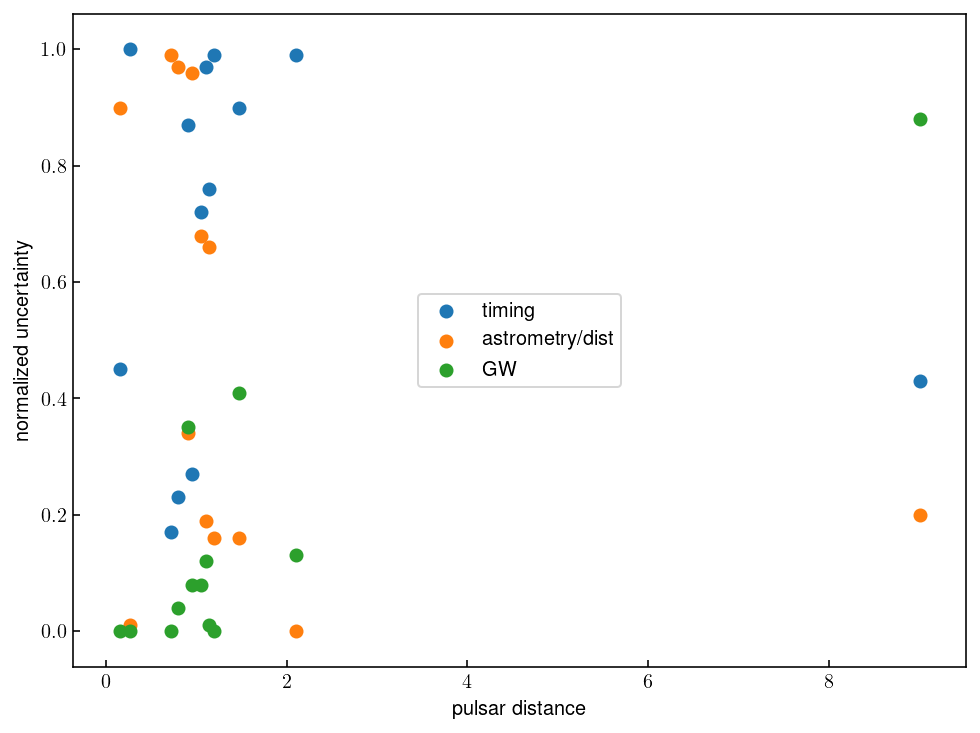

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(DIST, sy_pb_normalized,  marker='o', label="timing")
plt.scatter(DIST, sy_pm_normalized,  marker='o', label="astrometry/dist")
plt.scatter(DIST, sy_pbgw_normalized, marker='o',label="GW")
plt.legend(loc="center")

plt.ylabel("normalized uncertainty")
plt.xlabel("pulsar distance")

***
## Bayesian mixture model


In [9]:
def log_likelihood(theta, x, y, sx, sy, rxy):
    m, lVb = theta
    Vb = np.exp(lVb)
    res = y - m*x
    sig = np.sqrt(sy**2 + m**2 * sx**2 - 2*m*rxy*sx*sy)
    fg =  norm.pdf(res, 0, np.sqrt(sig**2 + Vb))
    #bg = Pb * norm.pdf(y, Yb, np.sqrt(sy**2 + Vb))
    
    return np.sum(np.log(fg))

def log_prior(theta):
    m, lVb = theta
    if -20.0 < m < 20.0 and -5.0 < lVb < 5.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, sx, sy, rxy):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, sx, sy, rxy)

initial = np.array([2, 0])
np.random.seed(1)
pos = initial + 1e-4 * np.random.randn(32, np.size(initial))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sx, sy, rxy))
sampler.run_mcmc(pos, 10000, progress=True);

100%|██████████| 10000/10000 [00:50<00:00, 198.37it/s]


## Display walker trajectories and compute autocorrelation time

In [10]:
tau = sampler.get_autocorr_time()
flat_samples = sampler.get_chain(discard=int(np.max(tau)*4), thin=int(np.max(tau)), flat=True)

## Make corner plot to visualize posterior samples

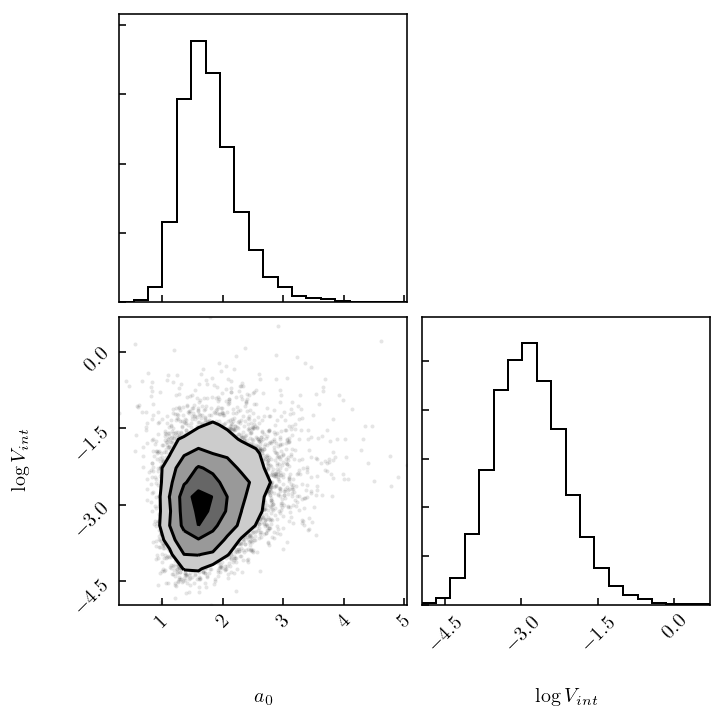

In [11]:
labels = ["$a_0$","$\log{V_{int}}$"]
fig = corner.corner(flat_samples, labels=labels, fill_contours=True)
plt.savefig('fig2binary2.png', dpi=300, bbox_inches='tight')

## Plot results

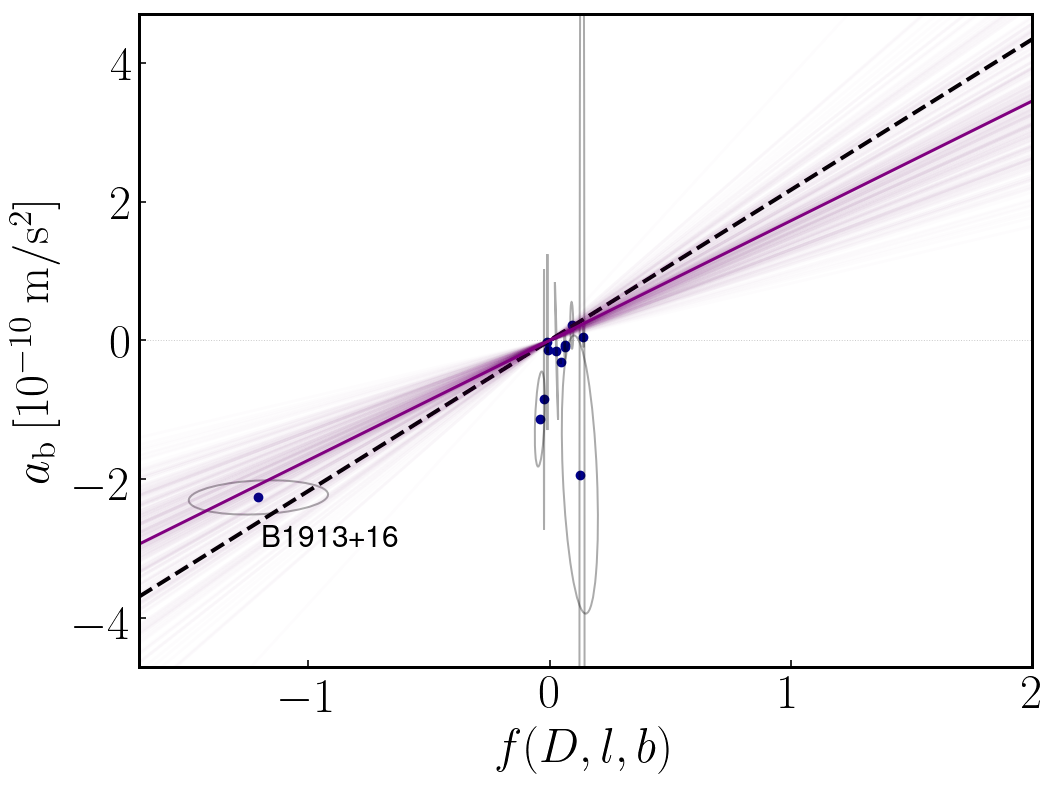

In [15]:
rcParams["font.size"] = 24

fig, ax = plt.subplots(figsize=(8,6))
xmax = 2.0
xmin = -1.7
ymin = -4.7
ymax = 4.7

framewidth = 1.5
ax.spines["bottom"].set_linewidth(framewidth)
ax.spines["top"].set_linewidth(framewidth)
ax.spines["left"].set_linewidth(framewidth)
ax.spines["right"].set_linewidth(framewidth)

mfit = np.percentile(flat_samples[:, 0], 50)
parfit=[mfit]
x0 = np.linspace(xmin,xmax,2)
yfit = mfit*x0 
inds = np.random.randint(len(flat_samples), size=300)

# Add expected line from kinematic measurements
plt.plot(x0,2.17*x0,"k--",lw=2)
# Add fit results
for ind in inds:
    sample = flat_samples[ind]
    msample = sample[0]
    plt.plot(x0, msample*x0, "purple", alpha=0.01)
plt.plot(x0,yfit,color="purple")
plt.plot(x0,[0, 0],"k:",alpha=0.2,lw=0.5)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel("$f(D,l,b)$")
plt.ylabel("$a_{\mathrm{b}}\:[10^{-10}\: \mathrm{m}/\mathrm{s}^2]$")

#ADD DATA POINTS
plt.scatter(x, y, s=15, c='darkblue', marker='o')
plt.text(x[10]+0.02,y[10]-0.7,PBdata['NAME'][10],fontsize=15,alpha=1) #Hulse-Taylor binary

#ADD ELLIPSES
ellipses = []
npoints = np.size(x)
for ii in range(npoints):
    ycovar = np.zeros((2,2))
    ycovar[0,0] = sx[ii]**2.
    ycovar[1,1] = sy[ii]**2.
    ycovar[0,1] = rxy[ii]*np.sqrt(ycovar[0,0]*ycovar[1,1])
    ycovar[1,0] = ycovar[0,1]
    eigs = linalg.eig(ycovar)
    angle = np.arctan(-eigs[1][0,1].real/eigs[1][1,1].real)/np.pi*180.
    thisellipse = Ellipse(np.array([x[ii],y[ii]]),2*np.sqrt(eigs[0][0].real),
                        2*np.sqrt(eigs[0][1].real),angle)
    ellipses.append(thisellipse)
ax = plt.gca()
i = 0 
for e in ellipses:
    ax.add_artist(e)
    e.set_facecolor('None')
    e.set_edgecolor('k')
    e.set_alpha(0.33)
    
# VISUALIZE EFFECTIVE Y-ERRORS
#yerr = np.sqrt(sy**2 + mfit**2 * sx**2 - 2*mfit*rxy*sx*sy)
#plt.errorbar(x, y, yerr, fmt=".b", capsize=2, elinewidth=0.09, markeredgewidth=0.1, markersize=0.1);

# Save plot as pdf
plt.savefig('fig3.pdf', dpi=300, bbox_inches='tight')

## Get parameter estimates and uncertainties

In [13]:
labels = ["\mathcal{a}_0","\log\mathcal{V}_{int}"]

mcmc = np.zeros(3)
for i in range(np.size(labels)):
    mcmc[0] = np.percentile(flat_samples[:, i], 16)
    mcmc[1] = np.percentile(flat_samples[:, i], 50)
    mcmc[2] = np.percentile(flat_samples[:, i], 84)
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>